Code to generate the error plots for the physical simulations

In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
!mkdir -p figures

In [2]:
# initialise data of lists.
data = {
        'Float32' :[3.13E-12, 8.77E-12, 8.56E-15, 8.03E+01],
        'Float16' :[1.95E-05, 1.39E-04, 7.70E-09, 6.36E+01],
        'BFloat16':[1.03E-03, 2.39E-03, 5.55E-07, 1.59E+02],
        'Posit32' :[6.11E-13, 1.01E-12, 5.31E-17, 4.00E+01],
        'Posit28' :[4.55E-12, 1.11E-11, 1.67E-15, 7.28E+01],
        'Posit24' :[1.74E-10, 3.83E-10, 1.52E-13, 7.40E+01],
        'Posit20' :[6.92E-08, 2.11E-07, 2.52E-11, 9.01E+01],
        'Posit16' :[8.58E-06, 1.97E-05, 5.12E-09, 7.63E+01],
        'Posit14' :[4.30E-05, 1.13E-03, 1.01E-07, 1.42E+02],
        'Posit12' :[6.02E-03, 5.39E-03, 1.38E-06, 3.26E+02],
        'Posit10' :[1.73E-02, 2.63E-01, 2.88E-05, 3.20E+02],
        'Posit8'  :[1.45E+00, 1.39E+00, 3.49E-04, 3.15E+02],
        }
idx = ['Brownian 1D', 'Brownian 2D', 'FFT', 'Lorenz' ]
 
# Create DataFrame
df = pd.DataFrame(data, index=idx)
 
# Print the output.
print(df)

                  Float32       Float16      BFloat16       Posit32  \
Brownian 1D  3.130000e-12  1.950000e-05  1.030000e-03  6.110000e-13   
Brownian 2D  8.770000e-12  1.390000e-04  2.390000e-03  1.010000e-12   
FFT          8.560000e-15  7.700000e-09  5.550000e-07  5.310000e-17   
Lorenz       8.030000e+01  6.360000e+01  1.590000e+02  4.000000e+01   

                  Posit28       Posit24       Posit20       Posit16  \
Brownian 1D  4.550000e-12  1.740000e-10  6.920000e-08  8.580000e-06   
Brownian 2D  1.110000e-11  3.830000e-10  2.110000e-07  1.970000e-05   
FFT          1.670000e-15  1.520000e-13  2.520000e-11  5.120000e-09   
Lorenz       7.280000e+01  7.400000e+01  9.010000e+01  7.630000e+01   

                  Posit14     Posit12     Posit10      Posit8  
Brownian 1D  4.300000e-05    0.006020    0.017300    1.450000  
Brownian 2D  1.130000e-03    0.005390    0.263000    1.390000  
FFT          1.010000e-07    0.000001    0.000029    0.000349  
Lorenz       1.420000e+02  326.0

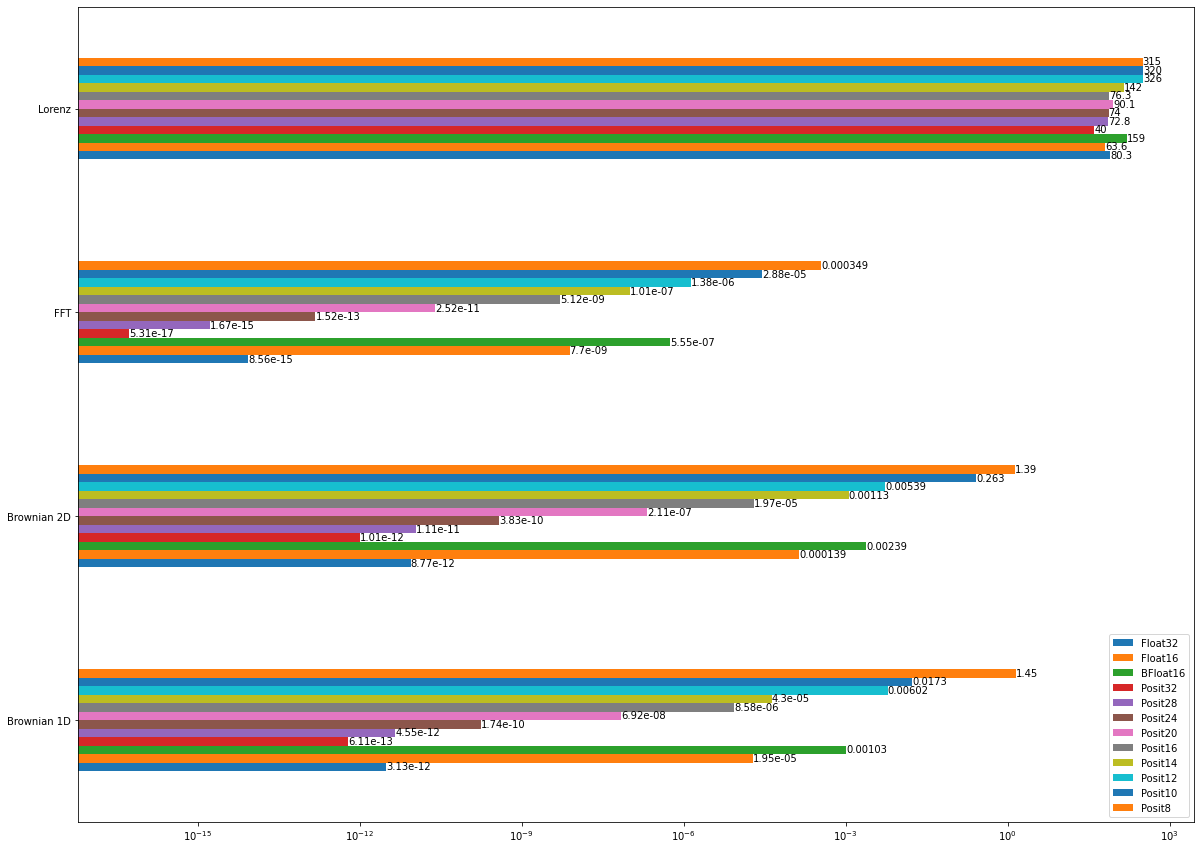

In [3]:
ax = df.plot.barh(rot=0, figsize=(20,15))
ax.set_xscale('log')

# Add labels with values
for c in ax.containers:
    plt.bar_label(c)

In [4]:
# # sb.set_style("darkgrid", {'axes.axisbelow': False})
# sb.set()
sb.set_theme()
sb.set_context("notebook", font_scale=1.3, rc={"lines.linewidth": 2.5})
# sb.set_context("notebook", rc={"lines.linewidth": 2.5})
# sb.set_context("notebook")

## Simulation of Brownian motion

In [5]:
# df[['Float32', 'Float16']]
br_df = df.loc[['Brownian 2D', 'Brownian 1D'], ['Float32', 'Float16', 'BFloat16', 'Posit32', 'Posit16', 'Posit12']]

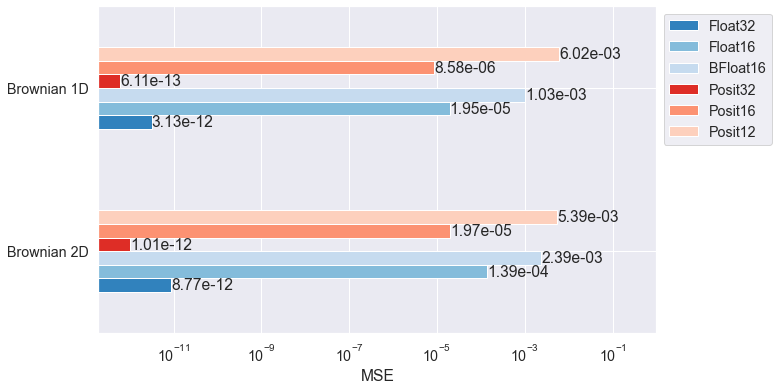

In [6]:
color_palette = ['#3182bd', '#84bcdb', '#c6dbef', '#de2d26', '#fc9272', '#fdd0bd']

ax = br_df.plot.barh(rot=0, figsize=(10,6), color=color_palette)
ax.set_xscale('log')
ax.set_xlim(right=1)
ax.legend(bbox_to_anchor=(1,1), loc="upper left")
ax.set_xlabel('MSE')

# Add labels with values
for c in ax.containers:
    plt.bar_label(c, fmt='%.2e')

# plt.tight_layout()
plt.savefig('figures/brownian.png', bbox_inches='tight', dpi=400)
plt.show()

## Computation of the Fast Fourier Transform (FFT)

In [16]:
Ls = 1024
Fs = 1000
Ts = 1/Fs

time = np.array([i*Ts for i in range(Ls)])
noise = np.random.randn(Ls)
s = 0.7*np.sin(2*np.pi*50*time) + np.sin(2*np.pi*120*time)
sn = s + 2*noise

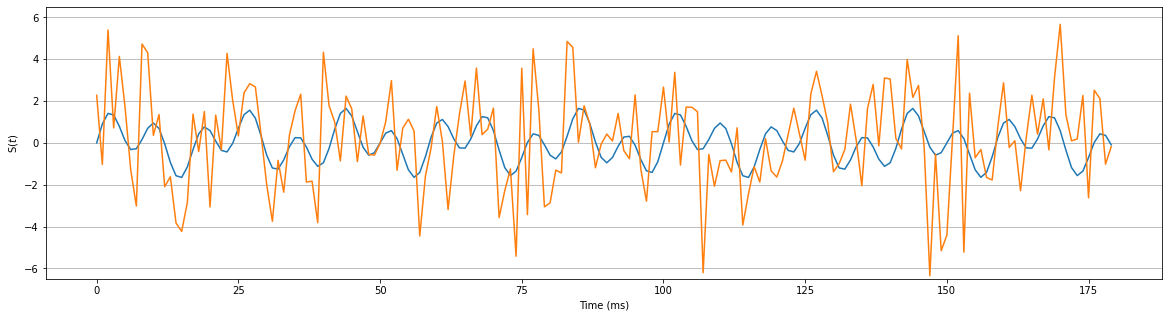

In [17]:
sb.reset_orig()

####
plt.figure( figsize=(20, 5))
plt.xlabel('Time (ms)')
plt.ylabel(r'S($t$)')
plt.grid(axis='y')
plt.ylim(-6.5, 6.5)

plt.plot(Fs*time[:180], s[:180])
# plt.vlines([0.7*i for i in range(1,2)], ymin=0, ymax=1)

plt.savefig('figures/orig_signal.png', bbox_inches='tight', dpi=400)
# plt.show()
# plt.figure( figsize=(20, 5))
plt.plot(Fs*time[:180], sn[:180])

plt.savefig('figures/corrup_signal.png', bbox_inches='tight', dpi=400)

In [9]:
sb.set_theme()
sb.set_context("notebook", font_scale=1.3, rc={"lines.linewidth": 2.5})

In [10]:
fft_df = df.loc[['FFT'], ['Float32', 'Float16', 'BFloat16', 'Posit32', 'Posit16', 'Posit12']]

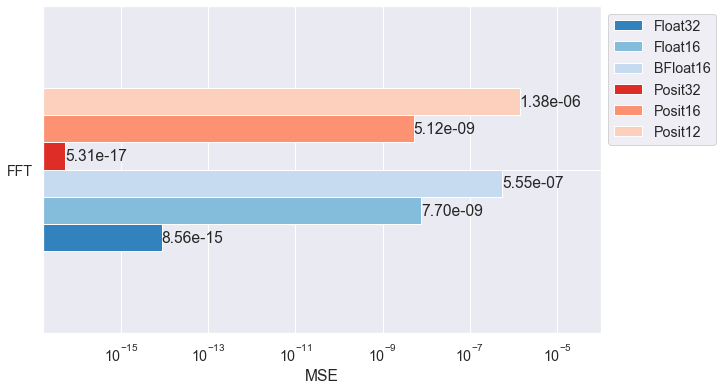

In [11]:
color_palette = ['#3182bd', '#84bcdb', '#c6dbef', '#de2d26', '#fc9272', '#fdd0bd']

ax = fft_df.plot.barh(rot=0, figsize=(10,6), color=color_palette)
ax.set_xscale('log')
ax.set_xlim(right=1e-4)
ax.legend(bbox_to_anchor=(1,1), loc="upper left")
ax.set_xlabel('MSE')

# Add labels with values
for c in ax.containers:
    plt.bar_label(c, fmt='%.2e')

# plt.tight_layout()
# plt.savefig('fft.pdf', bbox_inches='tight')
plt.savefig('figures/fft.png', bbox_inches='tight', dpi=400)
plt.show()

## Computation of solutions to the Lorenz system

In [12]:
lorenz_df = df.loc[['Lorenz'], ['Float32', 'Float16', 'BFloat16', 'Posit32', 'Posit20', 'Posit16']]

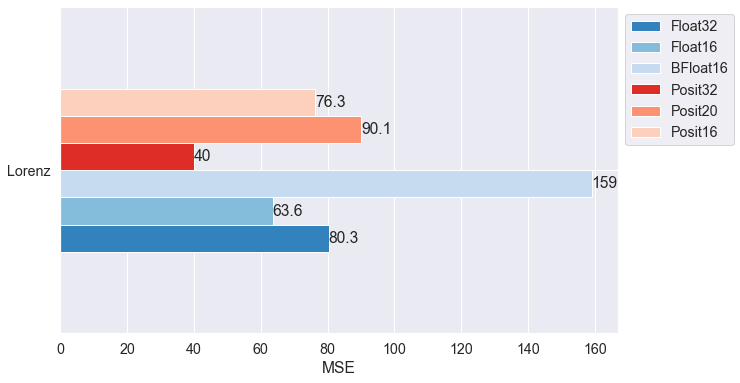

In [13]:
color_palette = ['#3182bd', '#84bcdb', '#c6dbef', '#de2d26', '#fc9272', '#fdd0bd']

ax = lorenz_df.plot.barh(rot=0, figsize=(10,6), color=color_palette)
# ax.set_xscale('log')
# ax.set_xlim(right=345)
ax.legend(bbox_to_anchor=(1,1), loc="upper left")
ax.set_xlabel('MSE')

# Add labels with values
for c in ax.containers:
    plt.bar_label(c)

# plt.tight_layout()
# plt.savefig('Lorenz.pdf', bbox_inches='tight')
plt.savefig('figures/Lorenz.png', bbox_inches='tight', dpi=400)
plt.show()